In [5]:
import numpy as np
import pandas as pd 
import math
from scipy import stats
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/movies.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 629.1+ KB


Based on the dataset summary, there are 35 null values for ratings which will not be included in the analysis. 
Next I will seperate the data frame into two(Comedy and Drama)

In [8]:
df_comedy = df[df['genre'] == 'Comedy']

df_comedy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2245 entries, 3 to 7664
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      2245 non-null   object 
 1   rating    2233 non-null   object 
 2   genre     2245 non-null   object 
 3   year      2245 non-null   int64  
 4   released  2245 non-null   object 
 5   score     2245 non-null   float64
 6   votes     2245 non-null   float64
 7   director  2245 non-null   object 
 8   writer    2244 non-null   object 
 9   star      2245 non-null   object 
 10  country   2245 non-null   object 
 11  budget    1510 non-null   float64
 12  gross     2192 non-null   float64
 13  company   2243 non-null   object 
 14  runtime   2245 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 201.7+ KB


In [9]:
df_drama = df[df['genre'] == 'Drama']

df_drama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518 entries, 0 to 7666
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1518 non-null   object 
 1   rating    1483 non-null   object 
 2   genre     1518 non-null   object 
 3   year      1518 non-null   int64  
 4   released  1517 non-null   object 
 5   score     1516 non-null   float64
 6   votes     1516 non-null   float64
 7   director  1518 non-null   object 
 8   writer    1517 non-null   object 
 9   star      1518 non-null   object 
 10  country   1517 non-null   object 
 11  budget    880 non-null    float64
 12  gross     1468 non-null   float64
 13  company   1509 non-null   object 
 14  runtime   1516 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 136.4+ KB


Visualization and stats of the data to determine if it is normally distributed.


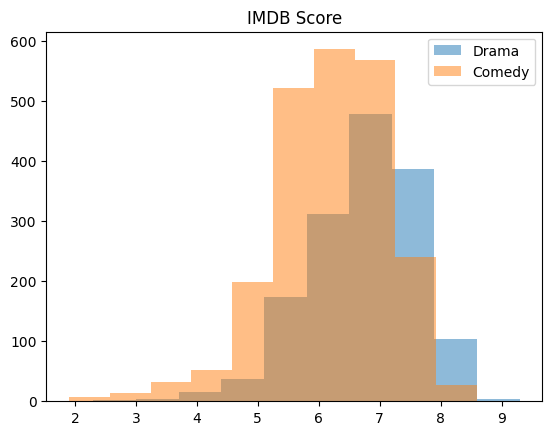

DescribeResult(nobs=1516, minmax=(2.3, 9.3), mean=6.693667546174143, variance=0.7626925468272422, skewness=-0.6772507977405915, kurtosis=1.206733301878666)
DescribeResult(nobs=2245, minmax=(1.9, 8.6), mean=6.193986636971046, variance=0.8860823616751825, skewness=-0.725329694207455, kurtosis=1.3592011929806977)


In [11]:
import matplotlib.pyplot as plt
plt.hist(df_drama["score"].dropna(), alpha = .5,  label = "Drama")
plt.hist(df_comedy["score"].dropna(), alpha = .5, label = "Comedy")
plt.legend(loc="upper right")
plt.title("IMDB Score")
plt.show()

print(stats.describe(df_drama["score"].dropna()))
print(stats.describe(df_comedy["score"].dropna()))

The skewness and kurtosis are with in reasonable meaures. The data meets the assumptions, and a t-test can be performed.

In [12]:
stats.ttest_ind(df_drama["score"].dropna(),df_comedy["score"].dropna())

Ttest_indResult(statistic=16.436307376038968, pvalue=1.1192397226142836e-58)

The t-statistic is greater than 1.96 and the p-value is less than .05, therefore I can reject the null hypothesis. 


In [13]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df_drama["score"].dropna(), df_comedy["score"].dropna())

'The difference in means at the 95% confidence interval (two-tail) is between -0.5584085675752244 and -0.44095325083096865.'

With a 95% confidence, comedy movies have an imdb score 0.5 points lower than movies classified as dramas.

In [23]:
%pip install seaborn



Visualizing the difference in means.

[[Text(0, 0, 'Drama'), Text(1, 0, 'Comedy')]]

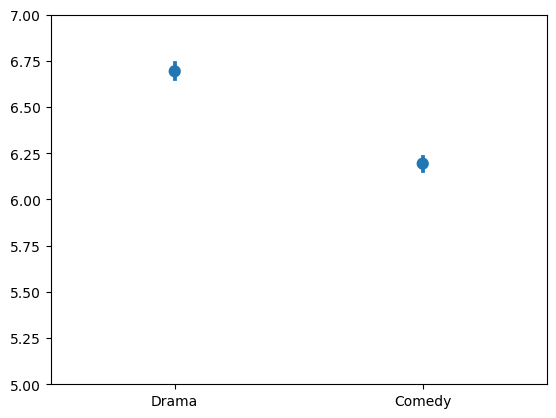

In [25]:
import seaborn as sns

g = sns.pointplot(data=[df_drama["score"].dropna(),
                        df_comedy["score"].dropna()], join=False)
g.set(ylim=(5, 7))                       
g.set(xticklabels = ['Drama', 'Comedy'])